# Imports

In [1]:
import sys
sys.executable

'/home/stav/.local/share/virtualenvs/vokenization-XaO4r3tO/bin/python'

In [2]:
import sys
sys.executable

'/home/stav/.local/share/virtualenvs/vokenization-XaO4r3tO/bin/python'

In [3]:
import os
import sys

In [4]:
import os
import sys
import h5py
import time
# import youtube_dl

import numpy as np
import pandas as pd

import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
# from ipywidgets import interact
from IPython.display import YouTubeVideo, Markdown, display, Video, Image

from tqdm.notebook import tqdm
tqdm.pandas()

In [5]:
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken/src')
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken')
sys.path.append('/home/stav/Projects/token_voken')

In [6]:
from src.common.path_resolvers import resolve_interval_raw_text_path
from src.common.display_utils import display_value_counts, printmd
from src.common.constants import FRAME_RATE

In [7]:
pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

# Constants

In [8]:
SPEAKER_NAME       = 'oliver'
INTERVALS_ORG_PATH = '/home/stav/Data/PATS_DATA/DataFrames/original/cmu_intervals_df.csv'
INTERVALS_PATH     = '/home/stav/Data/PATS_DATA/DataFrames/df_intervals_all.csv'
VIDEOS_PATH        = '/home/stav/Data/PATS_DATA/DataFrames/df_videos_all.csv'
INTERVALS_OLIVER_PATH = '/home/stav/Data/PATS_DATA/DataFrames/oliver/df_intervals_oliver_valid_text.csv'

In [9]:
PATS_SPEAKER_PATS_INTERVAL_DIR = '/home/stav/Data/PATS_DATA/Videos/oliver'

# DataFrames

### df_intervals_org

In [10]:
df_intervals_org = pd.read_csv(INTERVALS_ORG_PATH)

In [11]:
df_intervals_org.shape

(84289, 8)

In [12]:
df_intervals_org.head()

,dataset,delta_time,end_time,interval_id,speaker,start_time,video_fn,video_link
0,train,25.83,2019-06-07 00:13:07.420754,120149,almaram,2019-06-07 00:12:41.594928,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
1,train,47.78,2019-06-07 00:20:24.357691,120150,almaram,2019-06-07 00:19:36.576577,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
2,train,1.67,2019-06-07 00:08:39.252586,120312,almaram,2019-06-07 00:08:37.584251,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
3,train,22.09,2019-06-07 00:09:02.409076,120315,almaram,2019-06-07 00:08:40.320320,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
4,train,59.66,2019-06-07 00:24:26.266266,120472,almaram,2019-06-07 00:23:26.606607,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s


In [13]:
df_intervals_org['speaker'].value_counts().to_frame().head(n=15)

,speaker
angelica,19795
jon,8257
ellen,5605
colbert,4744
seth,4636
oliver,4629
corden,4408
noah,4367
conan,4266
chemistry,4083


In [14]:
df_intervals = pd.read_csv(INTERVALS_OLIVER_PATH)
df_intervals['interval_id'] = df_intervals['interval_id'].astype(str)
df_intervals.rename(columns={'delta_time': 'duration'}, inplace=True)

In [15]:
df_intervals.shape

(4629, 20)

In [16]:
df_intervals.head()

,Unnamed: 0,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,org_start_time,org_end_time,start_time_string,end_time_string,video_id,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded
0,43180,dev,12.21,0 days 00:01:10.830000,214428,oliver,0 days 00:00:58.620000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:00:58.620000,0 days 00:01:10.830000,00:00:58.62,00:01:10.83,DRauXXz6t0Y,88,True,False,False,True,False
1,43181,dev,6.14,0 days 00:01:17.110000,214429,oliver,0 days 00:01:10.970000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:01:10.970000,0 days 00:01:17.110000,00:01:10.97,00:01:17.11,DRauXXz6t0Y,31,True,True,False,True,False
2,43182,dev,102.44,0 days 00:02:59.670000,214430,oliver,0 days 00:01:17.240000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:01:17.240000,0 days 00:02:59.670000,00:01:17.24,00:02:59.67,DRauXXz6t0Y,75,True,False,True,False,False
3,43183,dev,6.87,0 days 00:03:06.750000,214431,oliver,0 days 00:02:59.870000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:02:59.870000,0 days 00:03:06.750000,00:02:59.87,00:03:06.75,DRauXXz6t0Y,25,True,True,False,True,False
4,43184,dev,16.15,0 days 00:06:07,214433,oliver,0 days 00:05:50.850000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:05:50.850000,0 days 00:06:07,00:05:50.85,00:06:07.0,DRauXXz6t0Y,92,True,False,False,True,False


In [17]:
df_intervals.columns

Index(['Unnamed: 0', 'dataset', 'duration', 'end_time', 'interval_id',
       'speaker', 'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_max_frames_per_token',
       'valid_duration', 'valid_single_token_per_frame', 'video_downloded'],
      dtype='object')

In [18]:
df_intervals.shape

(4629, 20)

In [19]:
LIST_BULLET = '  ◘ '
TAB = '&nbsp;&nbsp;&nbsp;&nbsp;'
VIDEO_ID_LEN = 11

In [20]:
! echo {PATS_SPEAKER_PATS_INTERVAL_DIR}
print('   Total Intervals:', end=' ')
! ls -al {PATS_SPEAKER_PATS_INTERVAL_DIR} | wc -l

/home/stav/Data/PATS_DATA/Videos/oliver
   Total Intervals: 130


In [21]:
COL_VALID_HD5 = 'valid_hd5'

In [22]:
COLS_VALIDITY = [
    'valid',
    'valid_max_frames_per_token',
    'valid_duration',
    'valid_single_token_per_frame'
]
COLS_VIEW = [
    'speaker', 'interval_id',
    'duration', 'start_time_string', 'end_time_string',
    'video_link'
]
COLS_VIDEOS = [
    'video_link',
    'data_ratio', 'duration_net', 'duration_total',
    'num_intervals'
]

## df_intervals

In [23]:
df_intervals.sample(n=3)[COLS_VIEW]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link
2738,oliver,102260,21.80,00:20:24.36,00:20:46.16,http://www.youtube.com/watch?v=5scez5dqtAc
587,oliver,216657,34.77,00:09:53.52,00:10:28.29,http://www.youtube.com/watch?v=RKjk0ECXjiQ
2835,oliver,105979,3.67,00:03:43.99,00:03:47.66,http://www.youtube.com/watch?v=3bxcc3SM_KA


In [24]:
df_intervals['speaker'].value_counts().to_frame()

,speaker
oliver,4629


In [25]:
def print_df_info(df):
    print(f'{LIST_BULLET}Videos: #{df["video_link"].nunique():,}')
    print(f'{LIST_BULLET}Intervals: #{df["interval_id"].nunique():,}')
    total_duration = df["duration"].sum()
    total_duration_string = time.strftime('%H hours, %M minutues, %S seconds', time.gmtime(total_duration))
    print(f'{LIST_BULLET}Total Duration: {total_duration_string} ({int(total_duration):,} seconds)')
    all_youtube = df_intervals['video_link'].str.contains('youtube').all()
    print(f'{LIST_BULLET}All are Youtube videos: {all_youtube}')

In [26]:
printmd(f'Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals)

Speaker **oliver**:

  ◘ Videos: #124
  ◘ Intervals: #4,629
  ◘ Total Duration: 18 hours, 15 minutues, 23 seconds (65,723 seconds)
  ◘ All are Youtube videos: True


## df_videos

### Duration: Net and Total

In [27]:
df_videos_all = pd.read_csv(VIDEOS_PATH)

In [28]:
df_videos_all[df_videos_all['video_link'] == 'https://www.youtube.com/watch?v=-V7QBRoxa4A']

,Unnamed: 0,speaker,actual_duration,video_id,video_link,duration_secs
4009,4009,noah,137.33,-V7QBRoxa4A,https://www.youtube.com/watch?v=-V7QBRoxa4A,366


In [29]:
df_videos = df_videos_all[df_videos_all['speaker'] == SPEAKER_NAME].copy()

In [30]:
df_videos.columns

Index(['Unnamed: 0', 'speaker', 'actual_duration', 'video_id', 'video_link',
       'duration_secs'],
      dtype='object')

In [31]:
df_videos.rename(
    columns={'actual_duration': 'duration_net', 'duration_secs': 'duration_total'},
    inplace=True)

In [32]:
df_videos.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
df_videos.head()

,speaker,duration_net,video_id,video_link,duration_total
4677,oliver,711.64,0Rnq1NpHdmw,http://www.youtube.com/watch?v=0Rnq1NpHdmw,1167
4678,oliver,104.77,2sWRXr2Yu9g,http://www.youtube.com/watch?v=2sWRXr2Yu9g,238
4679,oliver,52.72,3FCioWz7aps,http://www.youtube.com/watch?v=3FCioWz7aps,190
4680,oliver,328.06,3bxcc3SM_KA,http://www.youtube.com/watch?v=3bxcc3SM_KA,663
4681,oliver,505.44,3kEpZWGgJks,http://www.youtube.com/watch?v=3kEpZWGgJks,989


In [34]:
df_videos['data_ratio'] = df_videos['duration_net'] / df_videos['duration_total'] * 100
df_videos.sort_values('data_ratio', ascending=False, inplace=True)
# df_videos = df_videos[COLS_VIDEOS]
df_videos.head()

,speaker,duration_net,video_id,video_link,duration_total,data_ratio
4769,oliver,142.94,rrawNvcF64g,http://www.youtube.com/watch?v=rrawNvcF64g,187,76.44
4703,oliver,988.52,DnpO_RTSNmQ,http://www.youtube.com/watch?v=DnpO_RTSNmQ,1313,75.29
4705,oliver,"1,081.40",FVFdsl29s_Q,http://www.youtube.com/watch?v=FVFdsl29s_Q,1446,74.79
4737,oliver,644.11,_S2G8jhhUHg,http://www.youtube.com/watch?v=_S2G8jhhUHg,867,74.29
4687,oliver,653.59,5d667Bb_iYA,http://www.youtube.com/watch?v=5d667Bb_iYA,885,73.85


In [35]:
df_videos.tail()

,speaker,duration_net,video_id,video_link,duration_total,data_ratio
4797,oliver,67.87,l9qA8c-E_oA,https://www.youtube.com/watch?v=l9qA8c-E_oA,267,25.42
4686,oliver,126.00,5cBV8KFFasY,http://www.youtube.com/watch?v=5cBV8KFFasY,534,23.60
4745,oliver,36.30,dH573B1bkHI,http://www.youtube.com/watch?v=dH573B1bkHI,172,21.11
4723,oliver,79.55,UC_gXD5OE88,http://www.youtube.com/watch?v=UC_gXD5OE88,389,20.45
4782,oliver,6.40,-Z668Qc0P4Q,https://www.youtube.com/watch?v=-Z668Qc0P4Q,1412,0.45


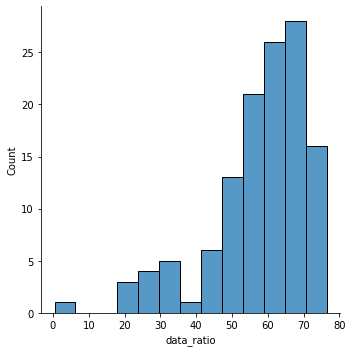

In [36]:
sns.displot(df_videos['data_ratio']);

In [37]:
df_videos['duration_total'].describe().to_frame()

,duration_total
count,124.00
mean,885.64
std,411.25
min,38.00
25%,678.00
50%,999.50
75%,"1,163.25"
max,"1,994.00"


## df_words

In [38]:
def read_text(interval_id):
    raw_text_path = resolve_interval_raw_text_path(interval_id)
    return pd.read_csv(raw_text_path)

def read_text_str(interval_id):
    return ' '.join(read_text(interval_id)['word'].tolist())

In [39]:
speaker_interval_ids = df_intervals['interval_id'].tolist()

In [40]:
type(speaker_interval_ids[100])

str

In [41]:
resolve_interval_raw_text_path(str(speaker_interval_ids[100]))

'/home/stav/Data/PATS_DATA/Videos/oliver/Ifi9M7DRazI/215196/Text/Raw.csv'

In [42]:
read_text('215196')

,word,start_frame,end_frame,frames_count
0,find,0,4,4
1,out,4,29,25
2,Trump,29,38,9
3,helping,38,43,5
4,noticeably,43,53,10
5,distance,53,62,9
6,from,62,71,9
7,this,71,73,2
8,whole,73,76,3
9,process,76,82,6


In [43]:
# dict(df_intervals.sort_values(['video_id', 'interval_id'])[['interval_id', 'video_id']].values.tolist()[4000-6:])

In [44]:
df_intervals[df_intervals['interval_id'] == '214428']

,Unnamed: 0,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,org_start_time,org_end_time,start_time_string,end_time_string,video_id,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded
0,43180,dev,12.21,0 days 00:01:10.830000,214428,oliver,0 days 00:00:58.620000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:00:58.620000,0 days 00:01:10.830000,00:00:58.62,00:01:10.83,DRauXXz6t0Y,88,True,False,False,True,False


In [45]:
interval_text_status = []
interval_id_to_df_words = {}
for interval_id in speaker_interval_ids:
    try:
        df_words = read_text(interval_id)
        interval_id_to_df_words[interval_id] = df_words
        has_text = True
    except FileNotFoundError as e:
        has_text = False
    interval_text_status.append([interval_id, has_text])

In [46]:
len(interval_id_to_df_words)

4254

# Intervals Validity

## Interval PATS Text

### Has Groups (`valid_hd5`)

In [47]:
df_interval_text_status = pd.DataFrame(interval_text_status, columns=['interval_id', COL_VALID_HD5])

In [48]:
df_interval_text_status.head()

,interval_id,valid_hd5
0,214428,True
1,214429,True
2,214430,True
3,214431,True
4,214433,True


In [49]:
df_interval_text_status[COL_VALID_HD5].value_counts().to_frame()

,valid_hd5
True,4254
False,375


In [50]:
df_intervals = df_intervals.merge(df_interval_text_status)
display_value_counts(df_intervals['valid_hd5'], 'Valid hd5 group')

,valid_hd5
True,4254
False,375


### Token Frames Duration (`valid_max_token_duration`)

In [51]:
MAX_SECONDS_PER_TOKEN = 10
MAX_FRAMES_THRESHOLD = FRAME_RATE * MAX_SECONDS_PER_TOKEN
print(f'Max allowed frames per token is: {MAX_FRAMES_THRESHOLD} frames (= {MAX_SECONDS_PER_TOKEN} seconds)')

Max allowed frames per token is: 150 frames (= 10 seconds)


In [52]:
UNKNOWN_MAX_FRAMES_PER_TOKEN = -1

def get_max_frames_number_for_token(interval_id):
    """
    returns the token idx and the range, of the token with the largest frame range
    """
    try:
        df_tokens = interval_id_to_df_words[interval_id]
        max_token_frames           = df_tokens['frames_count'].max()
        max_token_frames_token_idx = df_tokens['frames_count'].argmax()
    except:
        max_token_frames           = UNKNOWN_MAX_FRAMES_PER_TOKEN
        max_token_frames_token_idx = UNKNOWN_MAX_FRAMES_PER_TOKEN
    return max_token_frames, max_token_frames_token_idx

In [53]:
df_intervals['max_frames_token'] = df_intervals['interval_id'].apply(get_max_frames_number_for_token)

In [54]:
df_intervals['interval_id'].apply(get_max_frames_number_for_token)

0        (88, 0)
1        (31, 0)
2        (75, 8)
3       (25, 11)
4        (92, 0)
          ...   
4624     (39, 5)
4625     (17, 1)
4626     (18, 5)
4627    (86, 28)
4628    (16, 34)
Name: interval_id, Length: 4629, dtype: object

In [55]:
df_intervals['max_frames_token'], df_intervals['max_token_frames_token_idx'] = \
    zip(*df_intervals['interval_id'].apply(get_max_frames_number_for_token))

In [56]:
df_intervals.head(n=2)

,Unnamed: 0,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,org_start_time,...,end_time_string,video_id,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded,valid_hd5,max_token_frames_token_idx
0,43180,dev,12.21,0 days 00:01:10.830000,214428,oliver,0 days 00:00:58.620000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:00:58.620000,...,00:01:10.83,DRauXXz6t0Y,88,True,False,False,True,False,True,0
1,43181,dev,6.14,0 days 00:01:17.110000,214429,oliver,0 days 00:01:10.970000,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,http://www.youtube.com/watch?v=DRauXXz6t0Y,0 days 00:01:10.970000,...,00:01:17.11,DRauXXz6t0Y,31,True,True,False,True,False,True,0


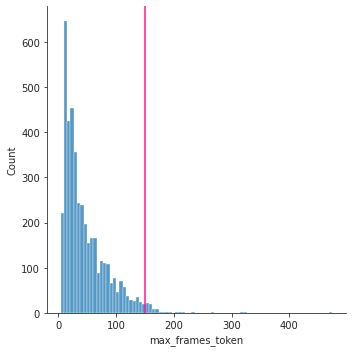

In [57]:
sns.set_style('ticks')
sns.displot(df_intervals[df_intervals['max_frames_token'] != -1]['max_frames_token'])
plt.axvline(MAX_FRAMES_THRESHOLD, color='deeppink');

In [58]:
df_intervals.shape

(4629, 22)

In [59]:
mask_below_max_frames_limit = (df_intervals['max_frames_token'] < MAX_FRAMES_THRESHOLD)
mask_known_max_frames = (df_intervals['max_frames_token'] != UNKNOWN_MAX_FRAMES_PER_TOKEN) 

df_intervals['valid_max_token_duration'] = mask_below_max_frames_limit & mask_known_max_frames
display_value_counts(df_intervals['valid_max_token_duration'], 'Valid Token Duration')

,valid_max_token_duration
True,4171
False,458


In [60]:
df_intervals[~(df_intervals['valid_max_token_duration'])].sample(n=5)[COLS_VIEW + ['max_frames_token', 'max_token_frames_token_idx']]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link,max_frames_token,max_token_frames_token_idx
1033,oliver,216686,1.87,00:05:21.45,00:05:23.32,http://www.youtube.com/watch?v=K4NRJoCNHIs,-1,-1
4508,oliver,103736,1.07,00:07:34.38,00:07:35.45,http://www.youtube.com/watch?v=4Z4j2CrJRn4,-1,-1
1074,oliver,214696,15.08,00:13:10.29,00:13:25.37,https://www.youtube.com/watch?v=poL7l-Uk3I8,163,16
666,oliver,214941,6.07,00:01:49.50,00:01:55.58,https://www.youtube.com/watch?v=Kye2oX-b39E,-1,-1
3844,oliver,101277,6.21,00:08:53.6,00:08:59.27,http://www.youtube.com/watch?v=Nn_Zln_4pA8,-1,-1


In [61]:
df_intervals[df_intervals['interval_id'] == 'cmu0000034989'][COLS_VIEW + ['max_frames_token', 'max_token_frames_token_idx']]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link,max_frames_token,max_token_frames_token_idx


In [62]:
read_text_str('cmu0000042143')

'fired her Trump Administration office and did it like that photoshoot'

In [63]:
read_text('cmu0000040509')[100:110]

,word,start_frame,end_frame,frames_count
100,know,534,537,3
101,what,537,540,3
102,I,540,542,2
103,bring,542,542,0
104,it,542,545,3
105,up,545,546,1
106,because,546,548,2
107,also,548,699,151
108,I,699,702,3
109,don't,702,704,2


### Multiple Words Per Frame (`valid_single_token_per_frame`)

In [64]:
df_tokens = read_text('cmu0000035126')
# printmd(f'**Video path**: {resolve_interval_video_path("101204")}')
# printmd(f'**Text path**: {resolve_interval_text_path("101204")}')
print(f'Start token unique: {df_tokens["start_frame"].is_unique}')
df_tokens[24:40]

Start token unique: False


,word,start_frame,end_frame,frames_count
24,felt,149,154,5
25,that,154,155,1
26,you,155,157,2
27,need,157,160,3
28,to,160,161,1
29,do,161,163,2
30,you,163,181,18
31,need,181,181,0
32,to,181,184,3
33,get,184,185,1


In [65]:
MAX_TOKENS_PER_FRAME_LIMIT = 3 # allow not more two tokens with the same start frame

def valid_single_frame_tokens_count(interval_id):
    df_tokens = interval_id_to_df_words.get(interval_id)
    if df_tokens is None:
        return False
    max_tokens_per_frame = df_tokens['start_frame'].value_counts().max()
    return max_tokens_per_frame <= MAX_TOKENS_PER_FRAME_LIMIT

In [66]:
df_intervals['valid_single_token_per_frame'] = df_intervals['interval_id'].apply(valid_single_frame_tokens_count)

In [67]:
display_value_counts(df_intervals['valid_single_token_per_frame'], f'Max of {MAX_TOKENS_PER_FRAME_LIMIT} tokens per frame')

,valid_single_token_per_frame
True,4089
False,540


In [68]:
display_value_counts(
    (df_intervals['valid_single_token_per_frame']) & (df_intervals['valid_max_token_duration']),
    'Valid so far'
)

,0
True,4014
False,615


### Frame Count (`valid_frames_count`)

In [69]:
def valid_interval_frame_count(interval_id, duration):
    df_tokens = interval_id_to_df_words.get(interval_id)
    if df_tokens is None:
        return False
    total_frames = df_tokens['end_frame'].max()
    max_tokens_per_frame = df_tokens['start_frame'].value_counts().max()
    lower_bound = (duration - 2) * FRAME_RATE
    upper_bound = (duration + 1) * FRAME_RATE
    is_valid = lower_bound <= total_frames <= upper_bound
    debug_symbol = '✓' if is_valid else '✗'
    if interval_id in df_intervals['interval_id'][:10].tolist():
        print(debug_symbol, interval_id, round(lower_bound, 2), total_frames, round(upper_bound, 2))
    return lower_bound <= total_frames <= upper_bound

In [70]:
df_intervals['valid_frames_count'] = df_intervals[['interval_id', 'duration']].apply(lambda x: valid_interval_frame_count(*x), axis=1)

✓ 214428 153.18 184 198.18
✓ 214429 62.09 93 107.09
✗ 214430 1506.54 1482 1551.54
✓ 214431 73.1 104 118.1
✓ 214433 212.24 241 257.24
✓ 214434 368.4 396 413.4
✓ 214435 70.1 101 115.1
✓ 214436 61.09 92 106.09
✓ 214438 1164.19 1190 1209.19
✗ 214439 124.15 123 169.15


In [71]:
display_value_counts(df_intervals['valid_frames_count'], f'Frame Count = Frame Rate * Seconds')

,valid_frames_count
True,4076
False,553


In [72]:
display_value_counts(
    ((df_intervals['valid_single_token_per_frame']) &
     (df_intervals['valid_max_token_duration']) &
     df_intervals['valid_frames_count']),
    'Valid so far'
)

,0
True,3991
False,638


In [73]:
read_text('cmu0000035126').head(n=20)

,word,start_frame,end_frame,frames_count
0,granny,0,40,40
1,you,40,58,18
2,think,58,62,4
3,he's,62,65,3
4,doing,65,67,2
5,a,67,70,3
6,good,70,73,3
7,job,73,76,3
8,as,76,82,6
9,president,82,85,3


## Interval Video

### Total Duration (`valid_duration`)

In [74]:
MIN_DURATION_SECS_THRESHOLD = 5

In [75]:
df_intervals.columns

Index(['Unnamed: 0', 'dataset', 'duration', 'end_time', 'interval_id',
       'speaker', 'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_max_frames_per_token',
       'valid_duration', 'valid_single_token_per_frame', 'video_downloded',
       'valid_hd5', 'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count'],
      dtype='object')

In [76]:
df_intervals['valid_duration'] = MIN_DURATION_SECS_THRESHOLD < df_intervals['duration']

In [77]:
df_intervals[~df_intervals['valid_duration']].sample(n=5)

,Unnamed: 0,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,org_start_time,...,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded,valid_hd5,max_token_frames_token_idx,valid_max_token_duration,valid_frames_count
751,43931,train,2.34,0 days 00:12:51.470000,216360,oliver,0 days 00:12:49.130000,Debt_Buyers_-_Last_Week_Tonight_with_John_Oliver_HBO-hxUAntt1z2c.mkv,http://www.youtube.com/watch?v=hxUAntt1z2c,0 days 00:12:49.130000,...,14,True,True,False,True,False,True,0,True,True
1208,44388,train,3.00,0 days 00:12:12.630000,217072,oliver,0 days 00:12:09.620000,FIFA_II_-_Last_Week_Tonight_with_John_Oliver_HBO-qr6ar3xJL_Q.mkv,http://www.youtube.com/watch?v=qr6ar3xJL_Q,0 days 00:12:09.620000,...,46,True,True,False,True,True,True,0,True,True
3731,46911,dev,2.14,0 days 00:03:07.650000,101715,oliver,0 days 00:03:05.510000,Sugar_-_Last_Week_Tonight_with_John_Oliver_HBO-MepXBJjsNxs.webm,http://www.youtube.com/watch?v=MepXBJjsNxs,0 days 00:03:05.510000,...,19,True,True,False,True,False,True,0,True,True
3326,46506,train,3.60,0 days 00:15:12.570000,103849,oliver,0 days 00:15:08.970000,Scientific_Studies_-_Last_Week_Tonight_with_John_Oliver_HBO-0Rnq1NpHdmw.webm,http://www.youtube.com/watch?v=0Rnq1NpHdmw,0 days 00:15:08.970000,...,40,True,True,False,True,False,True,0,True,True
3406,46586,dev,1.94,0 days 00:05:24.220000,104703,oliver,0 days 00:05:22.280000,Stadiums_-_Last_Week_Tonight_with_John_Oliver_HBO-xcwJt4bcnXs.mkv,http://www.youtube.com/watch?v=xcwJt4bcnXs,0 days 00:05:22.280000,...,12,True,True,False,True,False,True,4,True,True


In [78]:
read_text('216588')

,word,start_frame,end_frame,frames_count
0,Russia,0,70,70


In [79]:
read_text('214181')

,word,start_frame,end_frame,frames_count
0,this,0,2,2
1,is,2,5,3
2,clearly,5,8,3
3,pointless,8,32,24


In [80]:
read_text('105239')

,word,start_frame,end_frame,frames_count
0,put,0,0,0
1,it,0,1,1
2,in,1,4,3
3,the,4,6,2
4,microwave,6,6,0
5,problem,6,18,12
6,solved,18,22,4
7,I'm,22,33,11
8,a,33,33,0
9,legend,33,70,37


In [81]:
df_intervals_org[df_intervals_org['interval_id'] == '216588']

,dataset,delta_time,end_time,interval_id,speaker,start_time,video_fn,video_link
44763,train,4.60,2019-06-07 00:01:04.197531,216588,oliver,2019-06-07 00:00:59.592926,GoGetThoseGeckos_-_Last_Week_Tonight_with_John_Oliver_HBO-b436uUuf_VI.mkv,http://www.youtube.com/watch?v=b436uUuf_VI


In [82]:
display_value_counts(df_intervals['valid_duration'], f'Duration > {MIN_DURATION_SECS_THRESHOLD} seconds')

,valid_duration
True,3281
False,1348


## Intervals.merge(Videos)

In [83]:
# df_intervals.drop('Unnamed: 0', inplace=True, axis=1)
# df_intervals.drop('Unnamed: 0.1', inplace=True, axis=1)
# df_intervals.drop('duration_total_x', inplace=True, axis=1)

In [84]:
df_intervals.columns

Index(['Unnamed: 0', 'dataset', 'duration', 'end_time', 'interval_id',
       'speaker', 'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_max_frames_per_token',
       'valid_duration', 'valid_single_token_per_frame', 'video_downloded',
       'valid_hd5', 'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count'],
      dtype='object')

In [85]:
df_videos.columns

Index(['speaker', 'duration_net', 'video_id', 'video_link', 'duration_total',
       'data_ratio'],
      dtype='object')

In [86]:
set(df_intervals.columns) & set(df_videos.columns)

{'speaker', 'video_id', 'video_link'}

In [87]:
df_intervals = df_intervals.merge(df_videos, on=['speaker', 'video_id', 'video_link'])

In [88]:
df_intervals.columns

Index(['Unnamed: 0', 'dataset', 'duration', 'end_time', 'interval_id',
       'speaker', 'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_max_frames_per_token',
       'valid_duration', 'valid_single_token_per_frame', 'video_downloded',
       'valid_hd5', 'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count', 'duration_net', 'duration_total', 'data_ratio'],
      dtype='object')

### Total Duration (`valid_video_data_ratio`)

In [89]:
# The minimal allowed ratio between the total length of the intervals, to the full video length
MIN_VIDEO_DATA_RATIO_THRESHOLD = 10

In [90]:
df_intervals['valid_video_data_ratio'] = df_intervals['data_ratio'] > MIN_VIDEO_DATA_RATIO_THRESHOLD

In [91]:
display_value_counts(df_intervals['valid_video_data_ratio'], f'Video data ratio > {MIN_VIDEO_DATA_RATIO_THRESHOLD}%')

,valid_video_data_ratio
True,4628
False,1


## Finalize Valid

In [92]:
df_intervals.columns[df_intervals.columns.str.contains('valid_')].tolist()

['valid_max_frames_per_token',
 'valid_duration',
 'valid_single_token_per_frame',
 'valid_hd5',
 'valid_max_token_duration',
 'valid_frames_count',
 'valid_video_data_ratio']

In [93]:
df_intervals.drop('valid_max_frames_per_token', axis=1, errors='ignore', inplace=True)

In [94]:
COLS_VALID = [
    'valid_duration',
    'valid_single_token_per_frame',
    'valid_hd5',
    'valid_max_token_duration',
    'valid_frames_count',
    'valid_video_data_ratio'
]

In [95]:
total_intervals = len(df_intervals)
df_validity_summary = df_intervals[COLS_VALID].sum().to_frame().rename(columns={0: 'records'})
df_validity_summary['%records'] = df_validity_summary['records'] / total_intervals * 100
df_validity_summary

,records,%records
valid_duration,3281,70.88
valid_single_token_per_frame,4089,88.33
valid_hd5,4254,91.90
valid_max_token_duration,4171,90.11
valid_frames_count,4076,88.05
valid_video_data_ratio,4628,99.98


In [96]:
df_intervals['valid'] = df_intervals[COLS_VALID].all(axis=1)
display_value_counts(df_intervals['valid'], 'Valid Intervals')

,valid
True,2952
False,1677


In [97]:
df_validity_summary = df_intervals[['valid'] + COLS_VALID].sum().to_frame().rename(columns={0: 'records'})
df_validity_summary['%records'] = df_validity_summary['records'] / total_intervals * 100
df_validity_summary

,records,%records
valid,2952,63.77
valid_duration,3281,70.88
valid_single_token_per_frame,4089,88.33
valid_hd5,4254,91.90
valid_max_token_duration,4171,90.11
valid_frames_count,4076,88.05
valid_video_data_ratio,4628,99.98


In [98]:
df_intervals[['valid'] + COLS_VIEW + COLS_VALID].sample(n=2)

,valid,speaker,interval_id,duration,start_time_string,end_time_string,video_link,valid_duration,valid_single_token_per_frame,valid_hd5,valid_max_token_duration,valid_frames_count,valid_video_data_ratio
785,False,oliver,216435,36.77,00:10:43.81,00:11:20.58,http://www.youtube.com/watch?v=BUCnjlTfXDw,True,False,True,True,False,True
4313,False,oliver,102623,3.34,00:03:30.51,00:03:33.84,http://www.youtube.com/watch?v=CesHr99ezWE,False,True,True,True,True,True


In [99]:
read_text_str('102370')

'please make sure your apologies are the best ones of your life because thanks to the text that we are saddling you with they almost certainly will be'

# Download Data

## df_intervals.to_csv

In [100]:
df_intervals.columns

Index(['Unnamed: 0', 'dataset', 'duration', 'end_time', 'interval_id',
       'speaker', 'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded', 'valid_hd5',
       'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count', 'duration_net', 'duration_total', 'data_ratio',
       'valid_video_data_ratio'],
      dtype='object')

In [101]:
df_intervals.drop('dataset', axis=1, inplace=True)

In [102]:
df_intervals.drop('Unnamed: 0', axis=1, inplace=True)

In [103]:
df_intervals.columns

Index(['duration', 'end_time', 'interval_id', 'speaker', 'start_time',
       'video_fn', 'video_link', 'org_start_time', 'org_end_time',
       'start_time_string', 'end_time_string', 'video_id', 'max_frames_token',
       'valid', 'valid_duration', 'valid_single_token_per_frame',
       'video_downloded', 'valid_hd5', 'max_token_frames_token_idx',
       'valid_max_token_duration', 'valid_frames_count', 'duration_net',
       'duration_total', 'data_ratio', 'valid_video_data_ratio'],
      dtype='object')

In [104]:
df_intervals.rename(
    columns={'duration_net':   'video_duration_net',
             'duration_total': 'video_duration_total',
             'data_ratio':     'video_data_ratio'},
    inplace=True)

In [105]:
COLS_OUTPUT = [
    # core
    'speaker', 'video_id', 'interval_id', 'valid',
    # features
    'duration', 'start_time_string',  'end_time_string',
    'video_link', 'video_fn',
    'start_time', 'end_time',
    'org_start_time', 'org_end_time',
    # video info
#     'video_duration_net', 'video_duration_total', 'video_data_ratio',
    # validity
    'max_frames_token',
    'valid_duration', 'valid_single_token_per_frame', 'valid_hd5',
    'valid_max_token_duration', 'valid_frames_count', 'valid_video_data_ratio'
]

In [106]:
len(df_intervals.columns), len(COLS_OUTPUT)

(25, 20)

In [107]:
df_intervals_prev = df_intervals.copy()
df_intervals = df_intervals[COLS_OUTPUT]
df_intervals.head(n=2)

,speaker,video_id,interval_id,valid,duration,start_time_string,end_time_string,video_link,video_fn,start_time,end_time,org_start_time,org_end_time,max_frames_token,valid_duration,valid_single_token_per_frame,valid_hd5,valid_max_token_duration,valid_frames_count,valid_video_data_ratio
0,oliver,DRauXXz6t0Y,214428,True,12.21,00:00:58.62,00:01:10.83,http://www.youtube.com/watch?v=DRauXXz6t0Y,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,0 days 00:00:58.620000,0 days 00:01:10.830000,0 days 00:00:58.620000,0 days 00:01:10.830000,88,True,True,True,True,True,True
1,oliver,DRauXXz6t0Y,214429,True,6.14,00:01:10.97,00:01:17.11,http://www.youtube.com/watch?v=DRauXXz6t0Y,Abortion_Laws_-_Last_Week_Tonight_with_John_Oliver_HBO-DRauXXz6t0Y.webm,0 days 00:01:10.970000,0 days 00:01:17.110000,0 days 00:01:10.970000,0 days 00:01:17.110000,31,True,True,True,True,True,True


In [108]:
intervals_output_path = f'/home/stav/Data/PATS_DATA/DataFrames/{SPEAKER_NAME}/df_intervals_{SPEAKER_NAME}_v2.csv'
printmd(f'{TAB} → df_intervals {intervals_output_path}')
df_intervals.to_csv(intervals_output_path, index=False, header=True)

&nbsp;&nbsp;&nbsp;&nbsp; → df_intervals /home/stav/Data/PATS_DATA/DataFrames/oliver/df_intervals_oliver_v2.csv

In [115]:
df_intervals.shape

(4629, 20)

In [109]:
print(df_intervals[df_intervals['valid']]['interval_id'].tolist())

['214428', '214429', '214431', '214433', '214434', '214435', '214436', '214494', '214495', '214600', '215061', '215652', '215654', '215875', '215876', '215878', '216037', '216039', '216104', '216292', '216294', '216295', '216316', '216913', '214036', '214225', '214750', '214754', '214868', '214871', '214969', '214970', '214971', '214974', '215436', '215437', '215854', '215859', '216030', '216033', '216046', '216050', '216112', '216113', '216320', '216321', '216393', '216400', '216700', '216748', '216841', '216926', '217028', '214789', '214934', '214938', '215196', '215232', '215233', '215446', '215447', '215448', '215594', '215595', '215671', '215685', '216419', '216759', '216842', '216843', '216909', '216915', '216916', '217021', '217087', '217088', '214627', '214628', '214844', '215666', '215667', '215724', '215728', '215818', '215819', '215832', '215834', '216389', '216390', '216520', '216551', '216552', '216633', '216634', '216647', '216766', '214157', '214338', '214444', '214446',

In [110]:
printmd(f'[VALID] Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals[df_intervals['valid']])

[VALID] Speaker **oliver**:

  ◘ Videos: #123
  ◘ Intervals: #2,952
  ◘ Total Duration: 14 hours, 45 minutues, 32 seconds (53,132 seconds)
  ◘ All are Youtube videos: True


In [112]:
printmd(f'[ALL] Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals)

[ALL] Speaker **oliver**:

  ◘ Videos: #124
  ◘ Intervals: #4,629
  ◘ Total Duration: 18 hours, 15 minutues, 23 seconds (65,723 seconds)
  ◘ All are Youtube videos: True


In [113]:
df_intervals[df_intervals['valid']]['video_id'].nunique()

123

In [114]:
sorted(df_intervals[df_intervals['valid']]['video_id'].unique().tolist())

['0Rnq1NpHdmw',
 '1Y1ya-yF35g',
 '1ZNZY-gd3K0',
 '2sWRXr2Yu9g',
 '32n4h0kn-88',
 '3FCioWz7aps',
 '3bxcc3SM_KA',
 '3kEpZWGgJks',
 '3lKYPp2Kp6s',
 '44fCfJQV7yQ',
 '4U2eDJnwz_s',
 '4Z4j2CrJRn4',
 '5cBV8KFFasY',
 '5d667Bb_iYA',
 '5scez5dqtAc',
 '5xnZ_CeTqyM',
 '6UsHHOCH4q8',
 '7-LPcVo7gC0',
 '7VG_s2PCH_c',
 '7y1xJAVZxXg',
 '8-hahRWhFvg',
 '8YQ_HGvrHEU',
 '92vuuZt7wak',
 '9PK-netuhHA',
 'A-4dIImaodQ',
 'AJKfs4ZnbNE',
 'AJm8PeWkiEU',
 'BUCnjlTfXDw',
 'BcR_Wg42dv8',
 'BgyqAD5Z6_A',
 'CesHr99ezWE',
 'DRauXXz6t0Y',
 'DlJEt2KU33I',
 'DnpO_RTSNmQ',
 'E_F5GxCwizc',
 'FVFdsl29s_Q',
 'GUizvEjR-0U',
 'GvtNyOzGogc',
 'HKMNKS-9ugY',
 'HNPRad65-Kg',
 'IYfgvS0FA7U',
 'Ifi9M7DRazI',
 'J6lyURyVz7k',
 'K4NRJoCNHIs',
 'KUdHIatS36A',
 'Kye2oX-b39E',
 'LfgSEwjAeno',
 'MepXBJjsNxs',
 'NnW5EjwtE2U',
 'Nn_Zln_4pA8',
 'OubM8bD9kck',
 'P8pjd1QEA0c',
 'PDylgzybWAw',
 'PsB1e-1BB4Y',
 'PuNIwYsz7PI',
 'QplQL5eAxlY',
 'RKjk0ECXjiQ',
 'TrS0uNBuG9c',
 'Tt-mpuR_QHQ',
 'UC_gXD5OE88',
 'UkBvsCMxrNU',
 'VdLf4fihP78',
 'WA0wKe

In [118]:
df_intervals_org.columns

Index(['dataset', 'delta_time', 'end_time', 'interval_id', 'speaker',
       'start_time', 'video_fn', 'video_link'],
      dtype='object')

In [119]:
df_intervals_org[df_intervals_org['video_link'].str.contains('MjVUgIaSQdE')]

,dataset,delta_time,end_time,interval_id,speaker,start_time,video_fn,video_link
81026,train,32.10,2019-09-26 00:00:32.099999905,cmu0000035962,noah,2019-09-26 00:00:00,MjVUgIaSQdE,https://www.youtube.com/watch?v=MjVUgIaSQdE
81027,train,36.60,2019-09-26 00:01:36.500000,cmu0000035964,noah,2019-09-26 00:00:59.900000095,MjVUgIaSQdE,https://www.youtube.com/watch?v=MjVUgIaSQdE
81028,train,13.93,2019-09-26 00:02:40.933333397,cmu0000035966,noah,2019-09-26 00:02:27,MjVUgIaSQdE,https://www.youtube.com/watch?v=MjVUgIaSQdE
81029,train,73.33,2019-09-26 00:04:35.766666651,cmu0000035970,noah,2019-09-26 00:03:22.433333397,MjVUgIaSQdE,https://www.youtube.com/watch?v=MjVUgIaSQdE
